# Feedforward Neural Network

Este ejemplo muestra como hacer el feedforwar en una red neuronal simple.

Se asignan pesos aleatorios por lo que la accuracy será muy mala.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creamos 3 nubes de puntos aleatorios centrados en [0,-2], [2,2] y [-2,2]

Nclass = 500

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

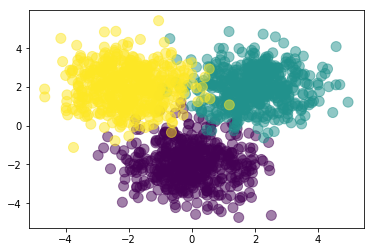

In [3]:
# lLas ploteamos para ver que aspecto tienen

plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [4]:
# Inicializacion random de los pesos
D = 2 # dimensionalidad de la entrada
M = 3 # numero de neuronas de la hidden
K = 3 # numero de clases
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [10]:
# Funcion que recibe la matriz de entrada (INPUT), los pesos y bias de la primera capa
# y los pesos y bias de la segunda capa
def forward(X, W1, b1, W2, b2):
    # En la capa hidden vamos a usar la sigmoide como funcion de activacion
    # entonces usamos X, W1 y b1
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    
    # luego para la capa de salida usamos Z, W2 y el bias y aplicamos la sigmoide 
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y

In [6]:
# Calculamos la accuracy del experimento
# num correctos / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in xrange(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [7]:
# Usamos la funcion anterior para calcular la probabilidad de obtener Y dado X
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

In [8]:
# verificamos si hemos usado el axis correcto
assert(len(P) == len(Y))

In [11]:
print "Ratio de valores correctos sobre el total de casos (con pesos aleatorios):", classification_rate(Y, P)

Ratio de valores correctos sobre el total de casos (con pesos aleatorios): 0.0273333333333
